In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

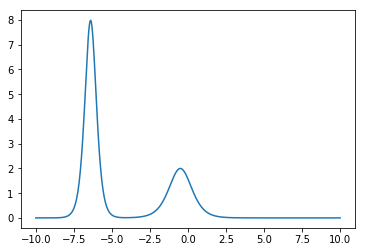

In [2]:
def two_soliton(x_raw, t=0, k1=1, k2=2, x1=0, x2=0):
    dx = x_raw[1] - x_raw[0]
    x = np.pad(x_raw, (1, 1), 'constant',
               constant_values=(x_raw[0]-dx, x_raw[-1]+dx))
    e1 = np.exp(2*k1*(x-4*k1*k1*t-x1))
    e2 = np.exp(2*k2*(x-4*k2*k2*t-x2))
    f = 1 + e1 + e2 + (k1-k2)*(k1-k2)/(k1+k2)/(k1+k2) * e1 * e2
    fl = -2 * np.log(f)
    return (fl[2:] - 2*fl[1:-1] + fl[:-2]) / (dx*dx)

x, dx = np.linspace(-10, 10, num=500, retstep=True)
plt.plot(x, -two_soliton(x, -0.4))

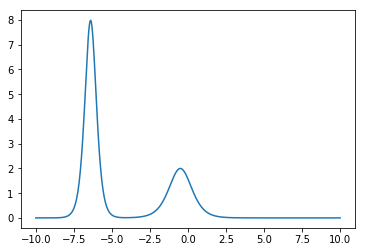

In [3]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

x, dx = np.linspace(-10, 10, num=500, retstep=True)
ts = np.linspace(-0.4, 0.4, num=30)
fig, ax = plt.subplots()
im, = ax.plot(x, -two_soliton(x, -0.4))
update = lambda t: im.set_data(x, -two_soliton(x, t))
anim = FuncAnimation(fig, update, interval=100, frames=ts)
HTML(anim.to_jshtml())

http://www.isc.meiji.ac.jp/~mizutani/python/sovling_kdv.html

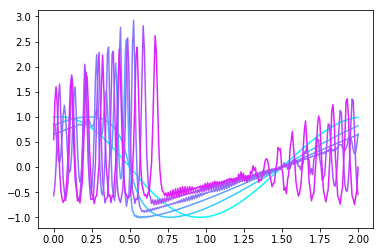

In [4]:
x = np.linspace(0, 2, num=256)
dx = 0.4
dt = 0.1 #min(dx/2/10, dx*dx*dx/10)
ep = 0.2
mu = 0.1

#u = -two_soliton(x, -0.4)
u = np.cos(np.pi*x)
up = np.pad(u, (2, 2), 'wrap')
u -= ep * dt/(6*dx) * (up[3:-1]+up[2:-2]+up[1:-3]) * (up[3:-1]-up[1:-3])
u -= mu * dt/(2*dx*dx*dx) * (up[4:]-2*up[3:-1]+2*up[1:-3]-up[:-4])

n_loop = 3000
cmap = plt.get_cmap("cool")
for i in range(n_loop):
    u, up = (up[2:-2], np.pad(u, (2, 2), 'wrap'))
    u -= ep * dt/(3*dx) * (up[3:-1]+up[2:-2]+up[1:-3]) * (up[3:-1]-up[1:-3])
    u -= mu * dt/(2*dx*dx*dx) * (up[4:]-2*up[3:-1]+2*up[1:-3]-up[:-4])
    if i%500==99:
        plt.plot(x, u, c=cmap(i/n_loop))

In [5]:
class KdV:
    def __init__(self, x):
        dx = 0.4
        dt = 0.1
        ep = 0.2
        mu = 0.1
        
        u  = np.cos(np.pi*x)
        up = np.pad(u, (2, 2), 'wrap')
        u -= ep * dt/(6*dx) * (up[3:-1]+up[2:-2]+up[1:-3]) * (up[3:-1]-up[1:-3])
        u -= mu * dt/(2*dx*dx*dx) * (up[4:]-2*up[3:-1]+2*up[1:-3]-up[:-4])
        
        self.dx = dx
        self.dt = dt
        self.ep = ep
        self.mu = mu
        self.u  = u
        self.up = up
    
    def step(self):
        dx = self.dx
        dt = self.dt
        ep = self.ep
        mu = self.mu
        
        u, up = (self.up[2:-2], np.pad(self.u, (2, 2), 'wrap'))
        u -= ep * dt/(3*dx) * (up[3:-1]+up[2:-2]+up[1:-3]) * (up[3:-1]-up[1:-3])
        u -= mu * dt/(2*dx*dx*dx) * (up[4:]-2*up[3:-1]+2*up[1:-3]-up[:-4])
        self.u  = u
        self.up = up
        return u
    
    def loop(self, n=10):
        for i in range(n):
            self.step()
        return self.u

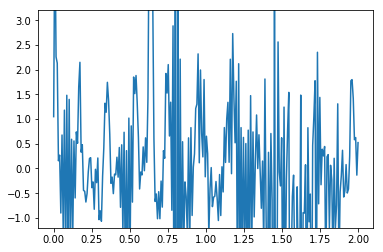

In [6]:
x = np.linspace(0, 2, num=256)
kdv = KdV(x)

fig, ax = plt.subplots()
im, = ax.plot(x, kdv.u)
ax.set_ylim([-1.2, 3.2])

update = lambda t: im.set_data(x, kdv.loop(100))
anim = FuncAnimation(fig, update, interval=100, frames=50)
HTML(anim.to_jshtml())

In [7]:
#anim.save('anim.gif', writer='imagemagick', fps=4)
#anim.save('anim.mp4', writer='ffmpeg', fps=4)